# Embeddings

https://www.youtube.com/watch?v=wSXGlvTR9UM

In [2]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/wSXGlvTR9UM?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


In [1]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Merge, Flatten

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('data/cmc.data',header=None,names=['Age','Education','H_education',
                                                     'num_child','Religion', 'Employ',
                                                     'H_occupation','living_standard',
                                                     'Media_exposure','contraceptive'])
df.head()

,Age,Education,H_education,num_child,Religion,Employ,H_occupation,living_standard,Media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [3]:
df.isnull().any()

Age                False
Education          False
H_education        False
num_child          False
Religion           False
Employ             False
H_occupation       False
living_standard    False
Media_exposure     False
contraceptive      False
dtype: bool

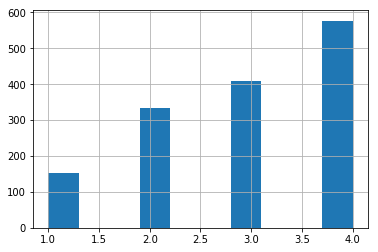

In [35]:
df.Education.hist()

In [4]:
df.shape

(1473, 10)

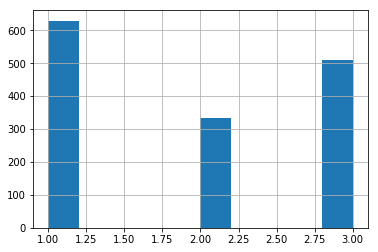

In [5]:
df.contraceptive.hist()

In [6]:
df.dtypes

Age                int64
Education          int64
H_education        int64
num_child          int64
Religion           int64
Employ             int64
H_occupation       int64
living_standard    int64
Media_exposure     int64
contraceptive      int64
dtype: object

In [7]:
def one_hot_encoding(idx):
    y = np.zeros((len(idx),max(idx)+1))
    y[np.arange(len(idx)), idx] = 1
    return y

In [8]:
scaler = StandardScaler()
df[['Age','num_child']] = scaler.fit_transform(df[['Age','num_child']]) 

In [39]:
x = df[['Age','num_child','Employ','Media_exposure']].values
y = one_hot_encoding(df.contraceptive.values-1)

liv_cats = df.living_standard.max()
edu_cats = df.Education.max()

liv = df.living_standard.values - 1
liv_one_hot = one_hot_encoding(liv)
edu = df.Education.values - 1
edu_one_hot = one_hot_encoding(edu)

train_x, test_x, train_liv, \
test_liv, train_edu, test_edu, train_y, test_y = train_test_split(x,liv_one_hot,edu_one_hot,y,test_size=0.1, random_state=1)

In [40]:
train_x = np.hstack([train_x, train_edu, train_liv])
test_x = np.hstack([test_x, test_edu, test_liv])

In [41]:
train_x.shape

(1325, 12)

In [42]:
train_edu.shape

(1325, 4)

In [43]:
train_liv.shape

(1325, 4)

In [11]:
train_x.shape

(1325, 12)

In [12]:
model = Sequential()
model.add(Dense(input_dim=train_x.shape[1],output_dim=12))
model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, nb_epoch=100, verbose=2)

/Users/sachin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12, input_dim=12)`
  from ipykernel import kernelapp as app
/Users/sachin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`
/Users/sachin/anaconda/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
0s - loss: 1.1002 - acc: 0.3894
Epoch 2/100
0s - loss: 1.0557 - acc: 0.4158
Epoch 3/100
0s - loss: 1.0371 - acc: 0.4370
Epoch 4/100
0s - loss: 1.0242 - acc: 0.4649
Epoch 5/100
0s - loss: 1.0140 - acc: 0.4762
Epoch 6/100
0s - loss: 1.0059 - acc: 0.4891
Epoch 7/100
0s - loss: 0.9989 - acc: 0.4913
Epoch 8/100
0s - loss: 0.9930 - acc: 0.4936
Epoch 9/100
0s - loss: 0.9877 - acc: 0.5034
Epoch 10/100
0s - loss: 0.9827 - acc: 0.5072
Epoch 11/100
0s - loss: 0.9781 - acc: 0.5147
Epoch 12/100
0s - loss: 0.9742 - acc: 0.5155
Epoch 13/100
0s - loss: 0.9706 - acc: 0.5185
Epoch 14/100
0s - loss: 0.9671 - acc: 0.5253
Epoch 15/100
0s - loss: 0.9642 - acc: 0.5230
Epoch 16/100
0s - loss: 0.9613 - acc: 0.5260
Epoch 17/100
0s - loss: 0.9587 - acc: 0.5283
Epoch 18/100
0s - loss: 0.9563 - acc: 0.5260
Epoch 19/100
0s - loss: 0.9539 - acc: 0.5313
Epoch 20/100
0s - loss: 0.9518 - acc: 0.5313
Epoch 21/100
0s - loss: 0.9497 - acc: 0.5343
Epoch 22/100
0s - loss: 0.9479 - acc: 0.5381
Epoch 23/100
0s - l

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
activation_1 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 195.0
Trainable params: 195.0
Non-trainable params: 0.0
_________________________________________________________________


In [14]:
for w in model.get_weights():
    print(w.shape)

(12, 12)
(12,)
(12, 3)
(3,)


In [15]:
model.evaluate(test_x, test_y, batch_size=256)

148/148 [==============================] - 0s


[0.85758495330810547, 0.587837815284729]

In [16]:
model.predict(test_x[:10])

array([[ 0.39239073,  0.2203065 ,  0.38730279],
       [ 0.82135081,  0.10566427,  0.07298491],
       [ 0.25139767,  0.17943899,  0.56916332],
       [ 0.3676849 ,  0.33580911,  0.29650599],
       [ 0.75309271,  0.13132168,  0.11558564],
       [ 0.16729502,  0.54943871,  0.28326628],
       [ 0.18573713,  0.45595431,  0.35830855],
       [ 0.8188768 ,  0.10733887,  0.0737843 ],
       [ 0.73907691,  0.04200678,  0.21891631],
       [ 0.64818466,  0.11329354,  0.2385218 ]], dtype=float32)

In [17]:
liv

array([2, 3, 3, ..., 3, 1, 3])

In [18]:
train_x, test_x, train_liv, \
test_liv, train_edu, test_edu, train_y, test_y = train_test_split(x,liv,edu,y,test_size=0.1, random_state=1)

In [19]:
# Input layer for religion
encoder_liv = Sequential()
encoder_liv.add(Embedding(liv_cats,4,input_length=1))
encoder_liv.add(Flatten())

# Input layer for religion
encoder_edu = Sequential()
encoder_edu.add(Embedding(edu_cats,4,input_length=1))
encoder_edu.add(Flatten())

# Input layer for triggers(x_b)
dense_x = Sequential()
dense_x.add(Dense(4, input_dim=x.shape[1]))

model = Sequential()
model.add(Merge([encoder_liv, encoder_edu, dense_x], mode='concat'))
# model.add(Activation('relu'))
model.add(Dense(output_dim=12))
model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/sachin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/Users/sachin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12)`
/Users/sachin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`


In [20]:
model.fit([train_liv[:,None], train_edu[:,None], train_x], train_y, nb_epoch=100, verbose=2)

/Users/sachin/anaconda/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
0s - loss: 1.1477 - acc: 0.3442
Epoch 2/100
0s - loss: 1.0408 - acc: 0.4242
Epoch 3/100
0s - loss: 1.0129 - acc: 0.4679
Epoch 4/100
0s - loss: 0.9960 - acc: 0.4755
Epoch 5/100
0s - loss: 0.9841 - acc: 0.4906
Epoch 6/100
0s - loss: 0.9750 - acc: 0.4981
Epoch 7/100
0s - loss: 0.9672 - acc: 0.5049
Epoch 8/100
0s - loss: 0.9604 - acc: 0.5034
Epoch 9/100
0s - loss: 0.9540 - acc: 0.5140
Epoch 10/100
0s - loss: 0.9490 - acc: 0.5223
Epoch 11/100
0s - loss: 0.9446 - acc: 0.5260
Epoch 12/100
0s - loss: 0.9408 - acc: 0.5260
Epoch 13/100
0s - loss: 0.9377 - acc: 0.5253
Epoch 14/100
0s - loss: 0.9350 - acc: 0.5374
Epoch 15/100
0s - loss: 0.9326 - acc: 0.5358
Epoch 16/100
0s - loss: 0.9301 - acc: 0.5374
Epoch 17/100
0s - loss: 0.9283 - acc: 0.5336
Epoch 18/100
0s - loss: 0.9266 - acc: 0.5404
Epoch 19/100
0s - loss: 0.9249 - acc: 0.5404
Epoch 20/100
0s - loss: 0.9236 - acc: 0.5434
Epoch 21/100
0s - loss: 0.9223 - acc: 0.5419
Epoch 22/100
0s - loss: 0.9213 - acc: 0.5457
Epoch 23/100
0s - l

In [44]:
dense_x.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 20        
Total params: 20.0
Trainable params: 20
Non-trainable params: 0.0
_________________________________________________________________


In [22]:
encoder_liv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 4)              16        
_________________________________________________________________
flatten_1 (Flatten)          (None, 4)                 0         
Total params: 16.0
Trainable params: 16.0
Non-trainable params: 0.0
_________________________________________________________________


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_1 (Merge)              (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
activation_3 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 247.0
Trainable params: 247.0
Non-trainable params: 0.0
_________________________________________________________________


In [23]:
for w in model.get_weights():
    print(w.shape)

AttributeError: 'list' object has no attribute 'shape'

In [24]:
w

[array([[-0.10935115, -0.23031998,  0.23564951,  0.3424432 ],
        [-0.06168354, -0.05825301,  0.111118  ,  0.16586818],
        [-0.15200721, -0.0934339 , -0.10459773,  0.00161025],
        [-0.04321436,  0.05898349, -0.01321368, -0.08363315]], dtype=float32)]

In [25]:
a = model.get_weights()
a

[[array([[-0.10935115, -0.23031998,  0.23564951,  0.3424432 ],
         [-0.06168354, -0.05825301,  0.111118  ,  0.16586818],
         [-0.15200721, -0.0934339 , -0.10459773,  0.00161025],
         [-0.04321436,  0.05898349, -0.01321368, -0.08363315]], dtype=float32)],
 [],
 [array([[ 0.3322866 ,  0.19930699, -0.24251796,  0.24181931],
         [ 0.19793722,  0.12741166, -0.18478565,  0.16072831],
         [ 0.00148587, -0.0822821 , -0.00326628,  0.04515119],
         [-0.09646862, -0.2633568 ,  0.16113301, -0.19863592]], dtype=float32)],
 [],
 [array([[-0.59816033,  0.87062579, -0.2976734 ,  0.08506605],
         [ 0.28670722,  0.01459732, -0.67885333,  0.91728342],
         [-0.72324103, -0.32768196,  0.8207261 ,  0.69913387],
         [-0.20462862,  0.6349501 , -0.34206402,  0.06973144]], dtype=float32),
  array([ 0.08511487, -0.05479484,  0.09653779,  0.01787456], dtype=float32)],
 [array([[ 0.54720604,  0.20560427,  0.38046002,  0.06325047, -0.53751922,
          -0.06238003, -0.0

In [26]:
model.evaluate([test_liv[:,None], test_edu[:,None], test_x],test_y, batch_size=256)

148/148 [==============================] - 0s


[0.86288201808929443, 0.60810810327529907]

In [27]:
p = model.predict([test_liv[:,None], test_edu[:,None], test_x], batch_size=256)
p[:5]

array([[ 0.29773653,  0.26741281,  0.43485063],
       [ 0.77942479,  0.11813645,  0.10243875],
       [ 0.18719749,  0.21930861,  0.59349388],
       [ 0.37331343,  0.36969444,  0.25699213],
       [ 0.69447452,  0.15733764,  0.14818783]], dtype=float32)

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_1 (Merge)              (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
activation_3 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 247.0
Trainable params: 247.0
Non-trainable params: 0.0
_________________________________________________________________


In [33]:
model = Sequential()
model.add(Dense(4, input_dim=train_x.shape[1]))
model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, nb_epoch=100)

/Users/sachin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`
/Users/sachin/anaconda/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
1325/1325 [==============================] - 0s - loss: 0.6348 - acc: 0.6531     
Epoch 2/100
1325/1325 [==============================] - 0s - loss: 0.6224 - acc: 0.6644     
Epoch 3/100
1325/1325 [==============================] - 0s - loss: 0.6165 - acc: 0.6662     
Epoch 4/100
1325/1325 [==============================] - 0s - loss: 0.6129 - acc: 0.6694     
Epoch 5/100
1325/1325 [==============================] - 0s - loss: 0.6105 - acc: 0.6699     
Epoch 6/100
1325/1325 [==============================] - 0s - loss: 0.6086 - acc: 0.6699     
Epoch 7/100
1325/1325 [==============================] - 0s - loss: 0.6073 - acc: 0.6737     
Epoch 8/100
1325/1325 [==============================] - 0s - loss: 0.6062 - acc: 0.6704     
Epoch 9/100
1325/1325 [==============================] - 0s - loss: 0.6053 - acc: 0.6707     
Epoch 10/100
1325/1325 [==============================] - 0s - loss: 0.6045 - acc: 0.6707     
Epoch 11/100
1325/1325 [==============================] - 0

In [34]:
model.evaluate(test_x,test_y,batch_size=256)

148/148 [==============================] - 0s


[0.56608289480209351, 0.70945948362350464]

In [95]:
model.fit?